# Hands-on Classification Problem

In [2]:
# Libraries
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Remove warning logging
warnings.filterwarnings("ignore")

# Set the seaborn style
sns.set(style="darkgrid")

In [4]:
# Load Dataset
df = pd.read_csv("titanic-2.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [5]:
# Data Preprocessing

# Drop unnecessary columns
# PassengerId, Name and Ticket are not useful for prediction since they are unique identifiers and do not provide any information about the passengers.
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

# Drop duplicates
# df.duplicated().sum() # Check for duplicates
df.drop_duplicates(inplace=True)

# Drop rows with missing values
print(f"Summary of Missing Values: {df.isnull().sum()}") # Check for missing values

Summary of Missing Values: Survived      0
Pclass        0
Sex           0
Age         109
SibSp         0
Parch         0
Fare          0
Cabin       586
Embarked      2
Title         0
dtype: int64


### Findings about the Missing Values

* Everytime we find these numbers we must consult with the business to validate how important these values are.
* Age is 1/8 of the total percentage. Still the data is important so it must be transformed.
* Cabin was investigated with the business. Explanation of the Nulls:
  * On the Titanic, third-class passengers who didn't have assigned cabin numbers typically slept in shared dormitory-style rooms. These accommodations were located in the lower decks of the ship and were separated by gender.

### Transform values

In [6]:
# Create a copy of the DataFrame
df2 = df.copy()
len(df2)

790

#### Embarked Column

In [7]:
# Drop the Embarked values with missing values
# df2 = df2[~df2["Embarked"].isnull()] # Alternative way to drop missing values
df2.dropna(subset=["Embarked"], inplace=True)

print(f"Missing values summary:\n{ df2.isnull().sum() } ") # Check for missing values
print(f"Number of rows after dropping missing values: { len(df2)} ")

Missing values summary:
Survived      0
Pclass        0
Sex           0
Age         109
SibSp         0
Parch         0
Fare          0
Cabin       586
Embarked      0
Title         0
dtype: int64 
Number of rows after dropping missing values: 788 


#### Cabin Column

In [8]:
# Convert Cabin NaN to a new boolean Column and drop the Cabin column
df2["Cabin"] = df2["Cabin"].fillna(0)
df2["hasCabin"] = df2.Cabin.apply(lambda x: 0 if x == 0 else 1)
df2.drop(columns=["Cabin"], inplace=True)

print(f"Missing values summary:\n{ df2.isnull().sum() } ") # Check for missing values

Missing values summary:
Survived      0
Pclass        0
Sex           0
Age         109
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
hasCabin      0
dtype: int64 


#### Age Column

The NaN values will be imputed with the average (of the selected technique) of the Age column data.

* [Scikit Learn - Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html)
* [Scikit Learn - Imputation techniques](https://scikit-learn.org/stable/api/sklearn.impute.html)
* [Scikit Learn - SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)


In [9]:
from sklearn.impute import SimpleImputer, KNNImputer

In [10]:
df3 = df2.copy()

In [11]:
# Age Column Imputation 1
# 1. Extracted the "Age" column from the dataframe into a separate dataframe `X`.
# 2. Initialized a `SimpleImputer` object (`imputer1`) with the strategy set to `"mean"`, which replaces missing values with the mean of the available values.
# 3. Fitted the imputer to the data in `X` to calculate the mean age.
# 4. Transformed the data, replacing missing values with the calculated mean, and stored the result in `X_new`.
# 5. Updated the original dataframe (`df2`) with the imputed age values.
# 6. Verified the imputation by checking the summary of missing values, confirming no missing values remain in the "Age" column.

## This code is commented out to avoid running it again. Another imputation method is used below.
X = df2[['Age']]
imputer1 = SimpleImputer(strategy="mean")
imputer1.fit(X)
X_new = imputer1.transform(X)
df2[['Age']] = X_new
print(f"Missing values summary:\n{ df2.isnull().sum() } ") # Check for missing values

Missing values summary:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
hasCabin    0
dtype: int64 


In [12]:
# Age Column Imputation 2
# Impute missing values in key columns using KNNImputer with 5 neighbors and nan_euclidean metric
# Fit the imputer to the selected columns and transform the data
# Update the dataframe with the imputed values and verify the result

key_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X = df3[key_columns]
imputer2 = KNNImputer(n_neighbors=5, metric="nan_euclidean")
imputer2.fit(X)
X_new = imputer2.transform(X)
df3[key_columns] = X_new
print(f"Missing values summary:\n{ df3.isnull().sum() } ")
print(f"DS Tail: \n{ df3.tail() } ")

Missing values summary:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
hasCabin    0
dtype: int64 
DS Tail: 
     Survived  Pclass     Sex   Age  SibSp  Parch   Fare Embarked Title  \
886         0     2.0    male  27.0    0.0    0.0  13.00        S   Rev   
887         1     1.0  female  19.0    0.0    0.0  30.00        S  Miss   
888         0     3.0  female  26.8    1.0    2.0  23.45        S  Miss   
889         1     1.0    male  26.0    0.0    0.0  30.00        C    Mr   
890         0     3.0    male  32.0    0.0    0.0   7.75        Q    Mr   

     hasCabin  
886         0  
887         1  
888         0  
889         1  
890         0   


#### Explanation of KNNImputer Technique in SciKit Learn

The **KNNImputer** (K-Nearest Neighbors Imputer) is a method provided by SciKit Learn to handle missing values in datasets. It works by estimating missing values based on the values of the nearest neighbors. Specifically, it follows these steps:

1. **Identify missing values**: For each data point with missing values, the algorithm finds the nearest neighbors based on the available (non-missing) features.
2. **Calculate distances**: It computes distances between data points using a specified distance metric (default is Euclidean distance).
3. **Impute missing values**: Missing values are filled by averaging (or taking the median, depending on the implementation) the corresponding values from the nearest neighbors.

This approach leverages the similarity between data points to estimate missing values, making it particularly useful when data points with similar characteristics are expected to have similar values.

### Explanation of the provided function:

```
KNNImputer(n_neighbors=5, metric="nan_euclidean")
```

- **`n_neighbors=5`**: Specifies that the algorithm will use the 5 nearest neighbors to estimate each missing value. The imputed value is the average of these neighbors' corresponding feature values.
- **`metric="nan_euclidean"`**: Defines the distance metric used to measure similarity between data points. The `"nan_euclidean"` metric is a variant of the Euclidean distance that can handle missing values by ignoring them when calculating distances. This allows the algorithm to compute distances even when some features are missing in the data points.

In summary, this function call creates a KNNImputer instance that fills missing values by averaging the values of the 5 closest neighbors, using a distance metric that gracefully handles missing data.

### Create a Plot comparing the results of both imputations

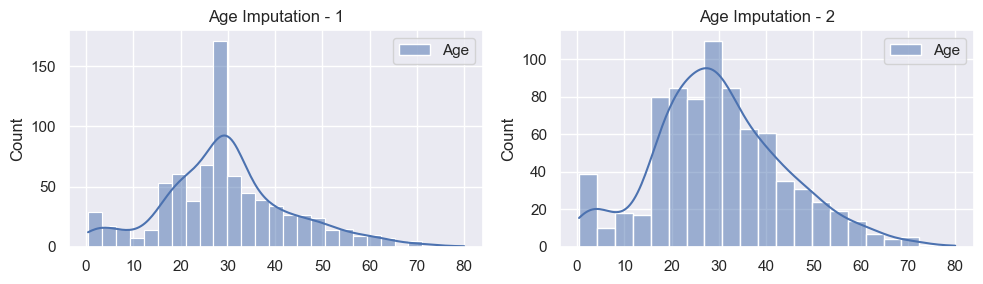

In [13]:
X1 = df2[['Age']]
X2 = df3[['Age']]

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title("Age Imputation - 1")
sns.histplot(X1, kde=True, ax=plt.gca())
plt.subplot(1, 2, 2)
plt.title("Age Imputation - 2")
sns.histplot(X2, kde=True, ax=plt.gca())
plt.tight_layout()
plt.show()

### Plots

In [14]:
df3.dtypes

Survived      int64
Pclass      float64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
Title        object
hasCabin      int64
dtype: object

In [15]:
# Create a Dataset with Categorical Variables only
cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'hasCabin', 'Embarked', 'Title']
num_cols = ['Age', 'Fare']

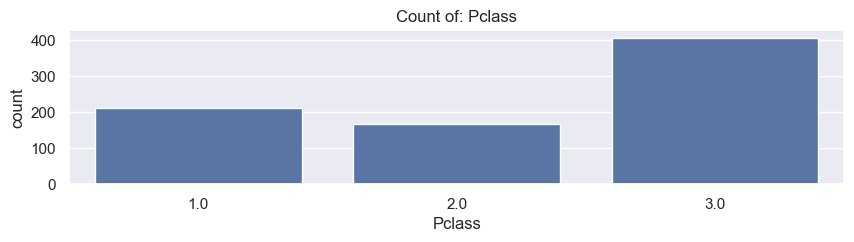

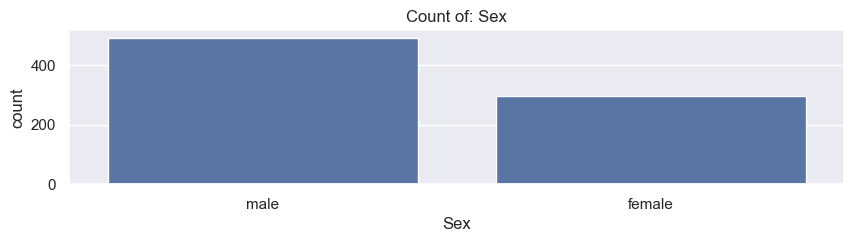

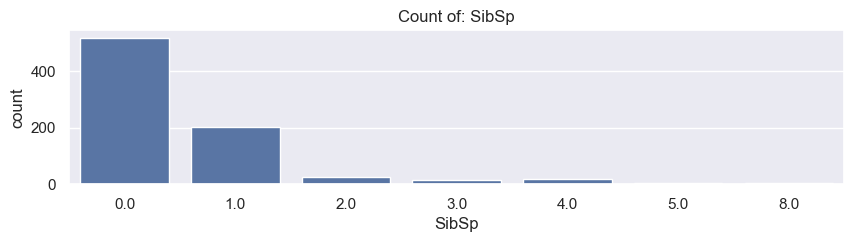

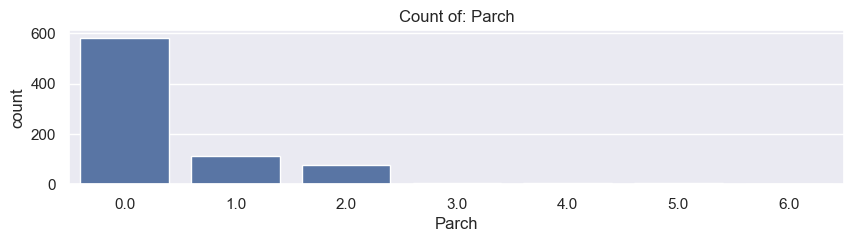

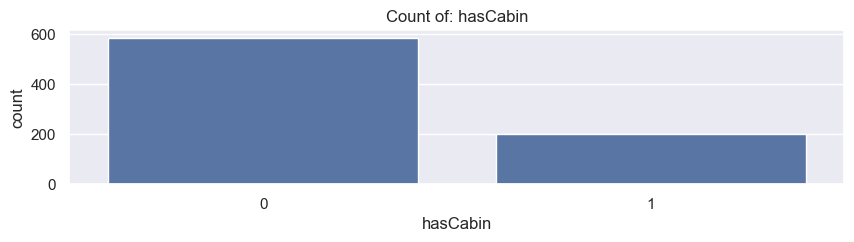

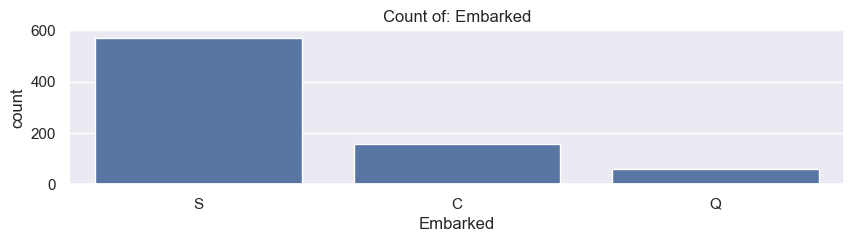

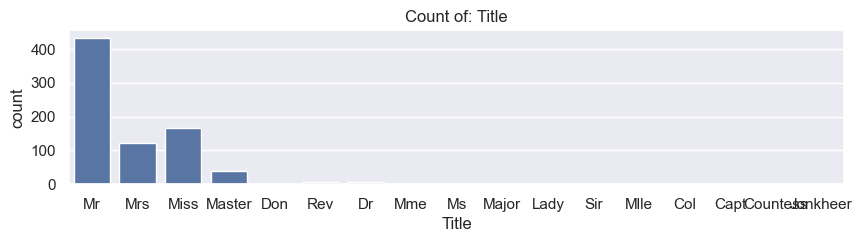

In [16]:
# Graphical Analysis of Categorical Variables Distribution
for col in cat_cols:
    plt.figure(figsize=(10, 2))
    sns.countplot(data=df3, x=col, ax=plt.gca())
    plt.title(f"Count of: {col}")
    #plt.xticks(rotation=45)
    plt.show()

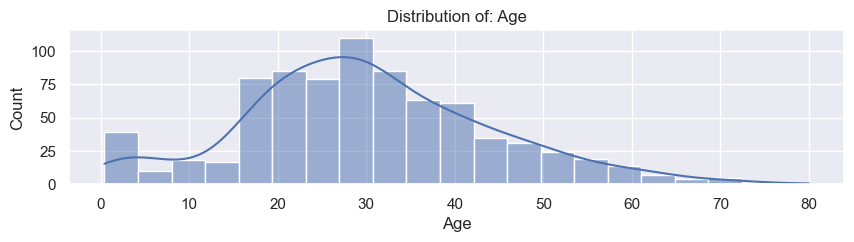

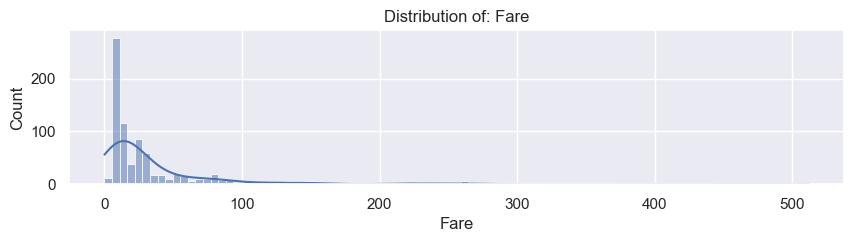

In [17]:
# Graphical Analysis of Numerical Variables Distribution
for col in num_cols:
    plt.figure(figsize=(10, 2))
    #sns.countplot(data=df3, x=col, ax=plt.gca())
    sns.histplot(data=df3, x=col, kde=True, ax=plt.gca())
    plt.title(f"Distribution of: {col}")
    #plt.xticks(rotation=45)
    plt.show()

### Categorical Transformations

In [18]:
df4 = df3.copy()

#### Joining Categories

In [19]:
# df4["SibSp"] = df4["SibSp"].apply(lambda x: 2 if x >= 2 else x)
# df4["Parch"] = df4["Parch"].apply(lambda x: 2 if x >= 2 else x)
# df4["Title"] = df4["Title"].apply(lambda x: x if x in ["Mr", "Mrs", "Miss"] else "Otros")

df4["SibSp"] = df4.SibSp.apply(lambda x: 2 if x >= 2 else x)
df4["Parch"] = df4.Parch.apply(lambda x: 2 if x >= 2 else x)
df4["Title"] = df4.Title.apply(lambda x: x if x in ["Mr", "Mrs", "Miss"] else "Otros")

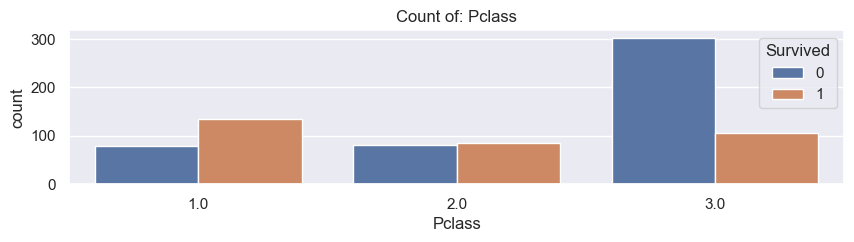

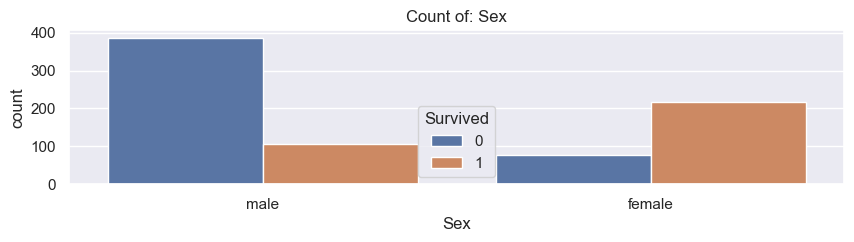

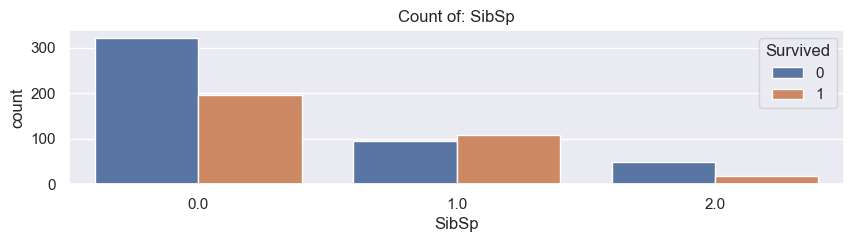

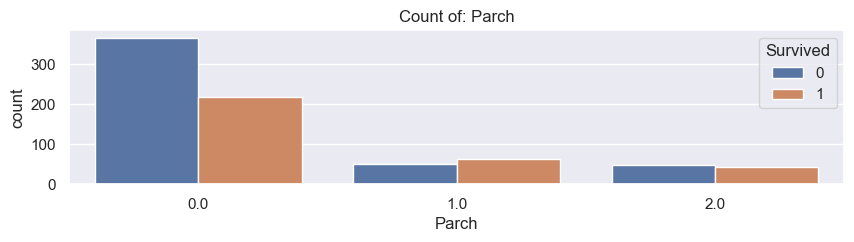

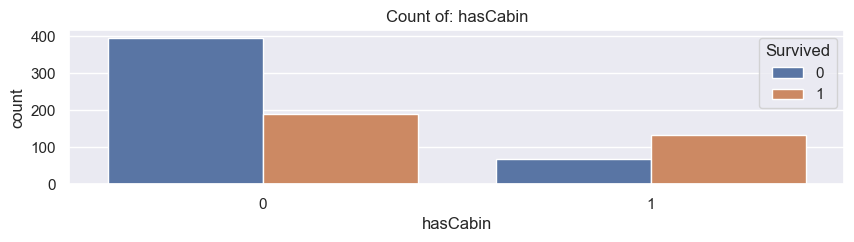

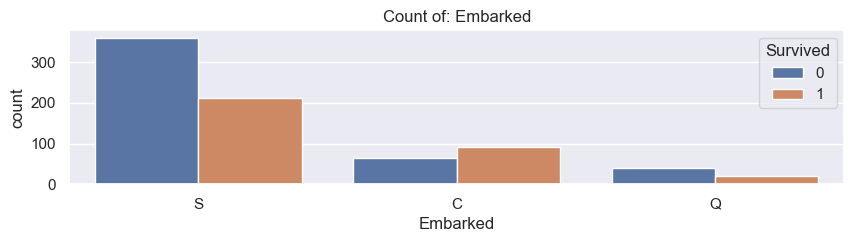

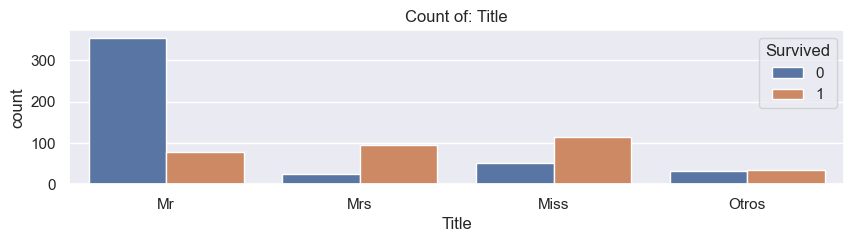

In [20]:
# Graphical Analysis of Categorical Variables Distribution
for col in cat_cols:
    plt.figure(figsize=(10, 2))
    sns.countplot(data=df4, x=col, hue="Survived", ax=plt.gca())
    plt.title(f"Count of: {col}")
    #plt.xticks(rotation=45)
    plt.show()

#### One Hot Encoder

* [Scikit-learn - OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

OneHotEncoder in Scikit-Learn is a preprocessing tool used to convert categorical data into a numerical format suitable for machine learning models. It applies one-hot encoding, which transforms categorical variables into binary vectors, ensuring that models can interpret them correctly.

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
df5 = df4.copy()

In [23]:
# Transform variable sex using OneHotEncoder
# Select the "Sex" column from df5 and store it in X
# Initialize OneHotEncoder with drop="if_binary" to avoid multicollinearity
# Fit the encoder to the "Sex" column and transform the data
# Convert the transformed data to an array and display the first 5 rows

X = df5[["Sex"]]
ohe_sex = OneHotEncoder(drop="if_binary")
X_new = ohe_sex.fit_transform(X)
X_new.toarray()[:5]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [24]:
# Transform variable Embarked using OneHotEncoder
#  The drop="first" parameter specifies that, for each categorical feature, the encoder will drop the first category when creating the binary (one-hot) columns. This is often done to avoid the "dummy variable trap," which can cause multicollinearity in linear models due to redundant information.
X = df5[["Embarked"]]
ohe_embarked = OneHotEncoder(drop="first")
X_new = ohe_embarked.fit_transform(X)
X_new.toarray()[:5]

array([[0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [25]:
df5

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,hasCabin
0,0,3.0,male,22.0,1.0,0.0,7.2500,S,Mr,0
1,1,1.0,female,38.0,1.0,0.0,71.2833,C,Mrs,1
2,1,3.0,female,26.0,0.0,0.0,7.9250,S,Miss,0
3,1,1.0,female,35.0,1.0,0.0,53.1000,S,Mrs,1
4,0,3.0,male,35.0,0.0,0.0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2.0,male,27.0,0.0,0.0,13.0000,S,Otros,0
887,1,1.0,female,19.0,0.0,0.0,30.0000,S,Miss,1
888,0,3.0,female,26.8,1.0,2.0,23.4500,S,Miss,0
889,1,1.0,male,26.0,0.0,0.0,30.0000,C,Mr,1


In [26]:
# Transform variable Title using OneHotEncoder
X = df5[["Title"]]
titles = [["Mr", "Mrs", "Miss"]]
ohe_title = OneHotEncoder(categories=titles, handle_unknown="ignore")
X_new = ohe_title.fit_transform(X)
X_new.toarray()[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

#### Compare the transformation techniques using OHE and Pandas Get Dummies

* [Pandas - get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [27]:
# The parameter drop_first=True tells pandas to drop the first category for each categorical variable, \
# which helps prevent multicollinearity (the "dummy variable trap") in linear models by removing \
# redundant information. The dtype=int argument ensures that the resulting columns are of integer \
# type (0 or 1), rather than the default boolean type.
pd.get_dummies(df4, drop_first=True, dtype=int).head()

,Survived,Pclass,Age,SibSp,Parch,Fare,hasCabin,Sex_male,Embarked_Q,Embarked_S,Title_Mr,Title_Mrs,Title_Otros
0,0,3.0,22.0,1.0,0.0,7.2500,0,1,0,1,1,0,0
1,1,1.0,38.0,1.0,0.0,71.2833,1,0,0,0,0,1,0
2,1,3.0,26.0,0.0,0.0,7.9250,0,0,0,1,0,0,0
3,1,1.0,35.0,1.0,0.0,53.1000,1,0,0,1,0,1,0
4,0,3.0,35.0,0.0,0.0,8.0500,0,1,0,1,1,0,0


## Automated the Variable Transformation

### Column Transformer

* [Scikit-learn - ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

The ColumnTransformer is a powerful tool in the scikit-learn library that allows you to apply different transformations to different columns of a dataset. This is particularly useful when dealing with heterogeneous data, where different columns may require different preprocessing steps.

In [28]:
from sklearn.compose import ColumnTransformer

In [29]:
df6 = df4.copy()
df6.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,hasCabin
0,0,3.0,male,22.0,1.0,0.0,7.2500,S,Mr,0
1,1,1.0,female,38.0,1.0,0.0,71.2833,C,Mrs,1
2,1,3.0,female,26.0,0.0,0.0,7.9250,S,Miss,0
3,1,1.0,female,35.0,1.0,0.0,53.1000,S,Mrs,1
4,0,3.0,male,35.0,0.0,0.0,8.0500,S,Mr,0


In [30]:
# Impute missing values for numerical columns using KNNImputer with 5 neighbors
# Encode binary categorical variable "Sex" using OneHotEncoder, dropping one category to avoid multicollinearity
# Encode categorical variables "Embarked" and "Pclass" using OneHotEncoder, dropping the first category to avoid multicollinearity
# Encode categorical variable "Title" using OneHotEncoder with predefined categories, ignoring unknown categories

titles = [["Mr", "Mrs", "Miss"]]

ctrasnf = ColumnTransformer([
    ("imputer", KNNImputer(n_neighbors=5), ['Age', 'SibSp', 'Parch', 'Fare']),
    ("enc1", OneHotEncoder(drop="if_binary"), ["Sex"]),
    ("enc2", OneHotEncoder(drop="first"), ["Embarked", 'Pclass']),
    ("enc3", OneHotEncoder(categories=titles, handle_unknown="ignore"), ["Title"])
    ], remainder="passthrough" # Keep the rest of the columns unchanged
)

X_new = ctrasnf.fit_transform(df6)
pd.DataFrame(X_new, columns=ctrasnf.get_feature_names_out()).head()

,imputer__Age,imputer__SibSp,imputer__Parch,imputer__Fare,enc1__Sex_male,enc2__Embarked_Q,enc2__Embarked_S,enc2__Pclass_2.0,enc2__Pclass_3.0,enc3__Title_Mr,enc3__Title_Mrs,enc3__Title_Miss,remainder__Survived,remainder__hasCabin
0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### Modelos de ML

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Crear Modelo End to End utilizando un Pipeline que Transforma variables y un algoritmo que entrena el modelo

In [32]:
# Show Columns data
print("Num Columns: " + str(num_cols))
print("Cat Columns: " + str(cat_cols))

Num Columns: ['Age', 'Fare']
Cat Columns: ['Pclass', 'Sex', 'SibSp', 'Parch', 'hasCabin', 'Embarked', 'Title']


In [33]:
# Create a pipeline with preprocessing and model training steps

X = df4[num_cols + cat_cols]
y = df4["Survived"]

seed = 99

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

alg = LogisticRegression(random_state=seed)

ctrasnf = ColumnTransformer([
    ("imputer", KNNImputer(n_neighbors=5), ['Age', 'SibSp', 'Parch', 'Fare']),
    ("enc1", OneHotEncoder(drop="if_binary"), ["Sex"]),
    ("enc2", OneHotEncoder(drop="first"), ["Embarked", 'Pclass']),
    ("enc3", OneHotEncoder(categories=titles, handle_unknown="ignore"), ["Title"])
    ], remainder="passthrough" # Keep the rest of the columns unchanged
)

model = Pipeline([
    ("mi_transformador", ctrasnf),
    ("mi_algoritmo", alg)
])

model.fit(X_train, y_train)


Pipeline(steps=[('mi_transformador',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer', KNNImputer(),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('enc1',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex']),
                                                 ('enc2',
                                                  OneHotEncoder(drop='first'),
                                                  ['Embarked', 'Pclass']),
                                                 ('enc3',
                                                  OneHotEncoder(categories=[['Mr',
                                                                             'Mrs',
                                                                             'Miss']],
                                                                handle_unknown='ignore'),
                                                  ['Title'])])),
                ('mi_algoritmo', LogisticRegression(random_state=99))])

In [34]:
y_hat = model.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_true=y_test, y_pred=y_hat)))

Accuracy Score: 0.8037974683544303


In [35]:
print("Model steps: \n"+ str(model.steps))

Model steps: 
[('mi_transformador', ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer', KNNImputer(),
                                 ['Age', 'SibSp', 'Parch', 'Fare']),
                                ('enc1', OneHotEncoder(drop='if_binary'),
                                 ['Sex']),
                                ('enc2', OneHotEncoder(drop='first'),
                                 ['Embarked', 'Pclass']),
                                ('enc3',
                                 OneHotEncoder(categories=[['Mr', 'Mrs',
                                                            'Miss']],
                                               handle_unknown='ignore'),
                                 ['Title'])])), ('mi_algoritmo', LogisticRegression(random_state=99))]


In [36]:
# Query the fitted model
print("Model enc1 feature names: " + str(model.steps[0][1]['enc1'].get_feature_names_out()))
print("Model enc1 categories: " + str(model.steps[0][1]['enc1'].categories_))

Model enc1 feature names: ['Sex_male']
Model enc1 categories: [array(['female', 'male'], dtype=object)]


## Transformaciones Numericas

* [Scikit-learn - preprocessing](https://scikit-learn.org/stable/api/sklearn.preprocessing.html)
* [Scikit-learn - non-linear-transformation](https://scikit-learn.org/stable/modules/preprocessing.html#non-linear-transformation)
* [Scikit-learn - PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

In [37]:
# Visualize the distribution of the "Fare" column
# The Fare column is a continuous variable representing the ticket fare paid by each passenger.
X = df6['Fare']

# Normal distribution
# # Notice that the Fare column has a long tail distribution, with most passengers paying lower fares and a few passengers paying significantly higher fares. \
# This distribution can be problematic for some machine learning algorithms, as they may not handle long-tailed distributions well. \

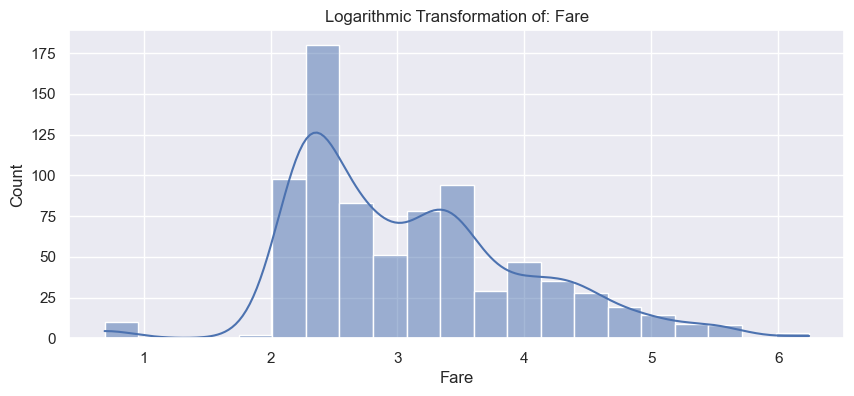

In [38]:
# Logarithmic transformation

plt.figure(figsize=(10, 4))
sns.histplot(np.log1p(X+1), kde=True, ax=plt.gca())
plt.title("Logarithmic Transformation of: Fare")
plt.show()
# The logarithmic transformation helps to reduce the skewness of the distribution and make it more symmetric.
# This can improve the performance of machine learning algorithms that assume a normal distribution of the input features.

### PowerTransformer Transformer

In [39]:
from sklearn.preprocessing import PowerTransformer

In [40]:
X = df6[['Fare']]

In [41]:
# Transform the "Fare" column using the Yeo-Johnson method
# The Yeo-Johnson transformation is a power transformation that can handle both positive and negative values. \
pt = PowerTransformer(method="yeo-johnson", standardize=True)
X_new = pt.fit_transform(X)

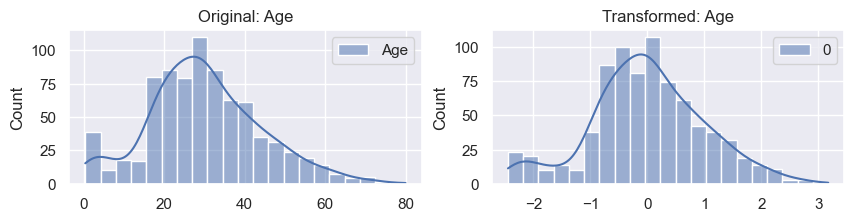

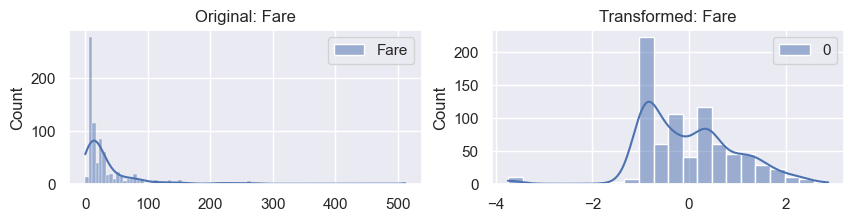

In [42]:
# Compare the original and transformed distributions
for col in num_cols:
    X = df6[[col]]
    X_new = pt.fit_transform(X)
    plt.figure(figsize=(10, 2))
    plt.subplot(1, 2, 1)
    plt.title(f"Original: {col}")
    sns.histplot(X, kde=True, ax=plt.gca())
    plt.subplot(1, 2, 2)
    plt.title(f"Transformed: {col}")
    sns.histplot(X_new, kde=True, ax=plt.gca())
    plt.show()

### Robust Scaler 

* [Scikit-learn - plot_all_scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)
* [Scikit-learn - RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

In [43]:
from sklearn.preprocessing import RobustScaler

## Modelo de ML avanzados

* [Scikit-learn - RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Random Forest is a method that combines the predictions of multiple decision trees to produce a more accurate and stable result. It can be used for both classification and regression tasks. In classification tasks, Random Forest Classification predicts categorical outcomes based on the input data. It uses multiple decision trees and outputs the label that has the maximum votes among all the individual tree predictions and in this article we will learn more about it.

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Create a pipeline with preprocessing and model training steps

X = df4[num_cols + cat_cols]
y = df4["Survived"]

seed = 99

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

alg = RandomForestClassifier(random_state=seed)

ctrasnf1 = ColumnTransformer([
    ("imputer", KNNImputer(n_neighbors=5), ['Age', 'SibSp', 'Parch', 'Fare']),
    ("enc1", OneHotEncoder(drop="if_binary"), ["Sex"]),
    ("enc2", OneHotEncoder(drop="first"), ["Embarked", 'Pclass']),
    ("enc3", OneHotEncoder(categories=titles, handle_unknown="ignore"), ["Title"])
    ], remainder="passthrough" # Keep the rest of the columns unchanged
)


ctrasnf2 = ColumnTransformer([
    # Transform the "Fare" column using the Yeo-Johnson method. The [0, 3] indicates the indices of the columns to be transformed which are imputer__Age and imputer__Fare. Check output of "model.steps[0][1].get_feature_names_out()" to find the names of the indexes.
    ("yeo-johnson", PowerTransformer(method="yeo-johnson"), [0, 3])
    ], remainder="passthrough" # Keep the rest of the columns unchanged
)

model = Pipeline([
    ("ctrasnf1", ctrasnf1),
    ("ctrasnf2", ctrasnf2),    
    ("RFC", alg)
])

model.fit(X_train, y_train)

Pipeline(steps=[('ctrasnf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer', KNNImputer(),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('enc1',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex']),
                                                 ('enc2',
                                                  OneHotEncoder(drop='first'),
                                                  ['Embarked', 'Pclass']),
                                                 ('enc3',
                                                  OneHotEncoder(categories=[['Mr',
                                                                             'Mrs',
                                                                             'Miss']],
                                                                handle_unknown='ignore'),
                                                  ['Title'])])),
                ('ctrasnf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('yeo-johnson',
                                                  PowerTransformer(),
                                                  [0, 3])])),
                ('RFC', RandomForestClassifier(random_state=99))])

In [50]:
model.steps[0][1].get_feature_names_out()

array(['imputer__Age', 'imputer__SibSp', 'imputer__Parch',
       'imputer__Fare', 'enc1__Sex_male', 'enc2__Embarked_Q',
       'enc2__Embarked_S', 'enc2__Pclass_2.0', 'enc2__Pclass_3.0',
       'enc3__Title_Mr', 'enc3__Title_Mrs', 'enc3__Title_Miss',
       'remainder__hasCabin'], dtype=object)

In [51]:
y_hat = model.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_true=y_test, y_pred=y_hat)))

Accuracy Score: 0.8037974683544303
